# Lab 2 - ANNDA

In [1]:
import rbf
import som
import numpy as np
import matplotlib.pyplot as plt

# RBF

## Supervised learning of Network Weights

### Sine Function

In [2]:
# Generate data
x_range = [0,2*np.pi]
step = 0.1
variance = 0.05
N = int((x_range[1]-x_range[0])/step)
X_train = np.array([[step*i for i in range(N)]])
X_test = np.array([[0.05 + step*i for i in range(N)]])
f_train = np.array(rbf.sample_f(X_train,rbf.sin,0))
f_train_noisy = np.array(rbf.sample_f(X_train,rbf.sin,variance))
f_test = np.array(rbf.sample_f(X_test,rbf.sin,0))
f_test_noisy = np.array(rbf.sample_f(X_train,rbf.sin,variance))

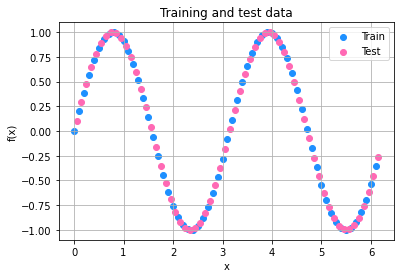

In [3]:
# Plot generated data
rbf.plot_data(X_train,X_test,f_train,f_test)

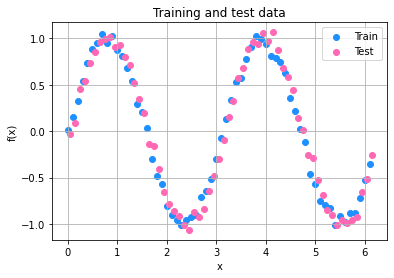

In [4]:
# Plot generated noisy data
rbf.plot_data(X_train,X_test,f_train_noisy,f_test_noisy)

In [5]:
# Define RBF Network Architecture
arch = [
    1, # Input dimensionality
    5, # Nodes per hidden layer
    1  # Output dimensionality
]
n = arch[1]
lr = 0.05
n_epochs = 100

In [6]:
# Create RBF Network
rbfnet = rbf.RBF(arch,rbf.gaussian_tf,lr,n_epochs)

### Least Squares

In [7]:
# Initialize weigths
rbfnet.initialize_weights()

In [8]:
# Initialize RBF params
step = (x_range[1]-x_range[0])/n
sigmas = np.array([1 for i in range(n)])
mus = np.array([step*i for i in range(n)])
rbfnet.initialize_rad_basis_fns(mus,sigmas)

In [9]:
# Train weights with LS method
rbfnet.least_squares(X_train,f_train_noisy)

In [10]:
# Approximate function samples
f_train_pred = rbfnet.forward_pass(X_train).T
f_test_pred = rbfnet.forward_pass(X_test).T

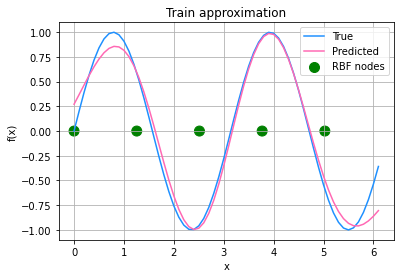

In [11]:
# Plot predicted vs actual output
title = 'Train approximation'
rbf.plot_series(rbfnet,X_train.T,f_train.T,f_train_pred.T,title)

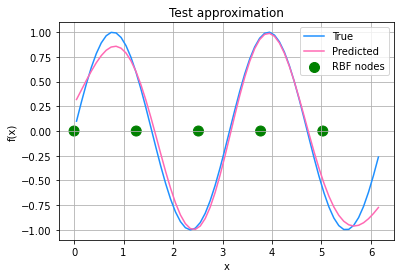

In [12]:
# Plot predicted vs actual output
title = 'Test approximation'
rbf.plot_series(rbfnet,X_test.T,f_test.T,f_test_pred.T,title)

In [13]:
# Compute residual error
res_error = rbf.residual_error(f_test,f_test_pred)
res_error

0.08171745943792372

### Delta Rule

In [14]:
# Initialize weigths
rbfnet.initialize_weights()

In [15]:
# Initialize RBF params
step = (x_range[1]-x_range[0])/n
sigmas = np.array([1 for i in range(n)])
mus = np.array([step*i for i in range(n)])
rbfnet.initialize_rad_basis_fns(mus,sigmas)

In [16]:
# Train weights with Delta Rule method
res_error_epochs, res_error_epochs_test = rbfnet.delta_rule(X_train,f_train,X_test,f_test,n_epochs)

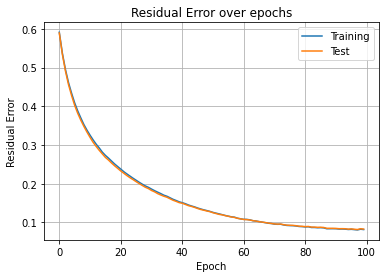

In [17]:
# Plot learning curves
rbf.plot_error(res_error_epochs,res_error_epochs_test,'Residual Error')

In [43]:
# Approximate function samples
f_train_pred = rbfnet.forward_pass(X_train).T
f_test_pred = rbfnet.forward_pass(X_test).T

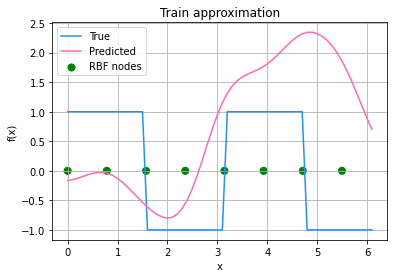

In [44]:
# Plot predicted vs actual output
title = 'Train approximation'
rbf.plot_series(rbfnet,X_train.T,f_train.T,f_train_pred.T,title)

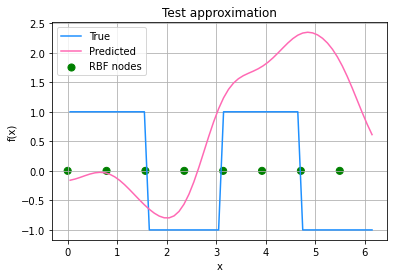

In [45]:
# Plot predicted vs actual output
title = 'Test approximation'
rbf.plot_series(rbfnet,X_test.T,f_test.T,f_test_pred.T,title)

In [46]:
# Compute residual error
res_error = rbf.residual_error(f_test,f_test_pred)
res_error

1.358446909079298

### Square Function

In [22]:
# Generate data
x_range = [0,2*np.pi]
step = 0.1
N = int((x_range[1]-x_range[0])/step)
X_train = np.array([[step*i for i in range(N)]])
X_test = np.array([[0.05 + step*i for i in range(N)]])
f_train = np.array(rbf.sample_f(X_train,rbf.square,0))
f_train_noisy = np.array(rbf.sample_f(X_train,rbf.square,variance))
f_test = np.array(rbf.sample_f(X_test,rbf.square,0))
f_test_noisy = np.array(rbf.sample_f(X_train,rbf.square,variance))

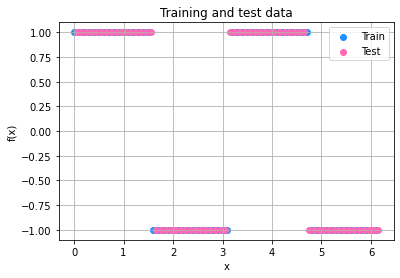

In [23]:
# Plot generated data
rbf.plot_data(X_train,X_test,f_train,f_test)

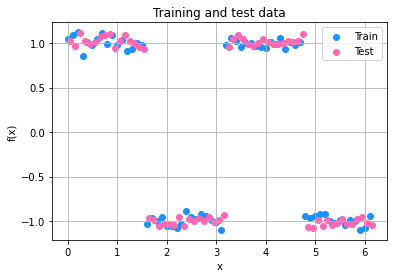

In [24]:
# Plot generated noisy data
rbf.plot_data(X_train,X_test,f_train_noisy,f_test_noisy)

In [25]:
# Define RBF Network Architecture
arch = [
    1, # Input dimensionality
    8, # Nodes per hidden layer
    1  # Output dimensionality
]
n = arch[1]
lr = 0.005
n_epochs = 50

In [26]:
# Create RBF Network
rbfnet = rbf.RBF(arch,rbf.gaussian_tf,lr,n_epochs)

### Least Squares

In [27]:
# Initialize weigths
rbfnet.initialize_weights()

In [28]:
# Initialize RBF params
step = (x_range[1]-x_range[0])/n
sigmas = np.array([0.5 for i in range(n)])
mus = np.array([step*i for i in range(n)])
rbfnet.initialize_rad_basis_fns(mus,sigmas)

In [29]:
# Train weights with LS method
rbfnet.least_squares(X_train,f_train_noisy)

In [30]:
# Approximate function samples
f_train_pred = rbfnet.forward_pass(X_train).T
f_test_pred = rbfnet.forward_pass(X_test).T

In [31]:
# Apply sgn() to outputs
f_train_pred_th = 2*(f_train_pred>=0)-1
f_test_pred_th = 2*(f_test_pred>=0)-1

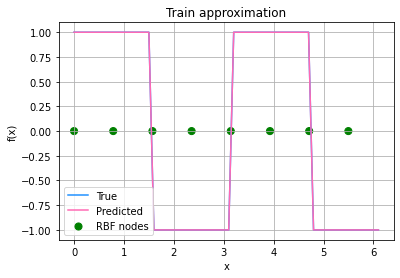

In [32]:
# Plot predicted vs actual output
title = 'Train approximation'
rbf.plot_series(rbfnet,X_train.T,f_train.T,f_train_pred_th.T,title)

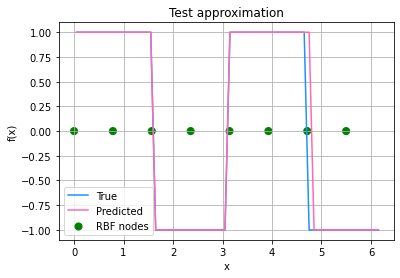

In [33]:
# Plot predicted vs actual output
title = 'Test approximation'
rbf.plot_series(rbfnet,X_test.T,f_test.T,f_test_pred_th.T,title)

In [34]:
# Compute residual error
res_error = rbf.residual_error(f_test,f_test_pred_th)
res_error

0.03225806451612903

### Delta Rule

In [35]:
# Initialize weigths
rbfnet.initialize_weights()

In [36]:
# Initialize RBF params
step = (x_range[1]-x_range[0])/n
sigmas = np.array([0.5 for i in range(n)])
mus = np.array([step*i for i in range(n)])
rbfnet.initialize_rad_basis_fns(mus,sigmas)

In [37]:
# Train weights with Delta Rule method
res_error_epochs, res_error_epochs_test = rbfnet.delta_rule(X_train,f_train,X_test,f_test,n_epochs)

In [ ]:
# Plot learning curves
rbf.plot_error(res_error_epochs,res_error_epochs_test,'Residual Error')

In [38]:
# Approximate function samples
f_train_pred = rbfnet.forward_pass(X_train).T
f_test_pred = rbfnet.forward_pass(X_test).T

In [39]:
# Apply sgn() to outputs
f_train_pred_th = 2*(f_train_pred>=0)-1
f_test_pred_th = 2*(f_test_pred>=0)-1

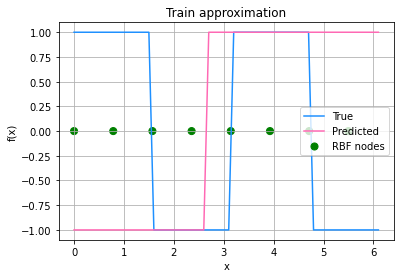

In [40]:
# Plot predicted vs actual output
title = 'Train approximation'
rbf.plot_series(rbfnet,X_train.T,f_train.T,f_train_pred_th.T,title)

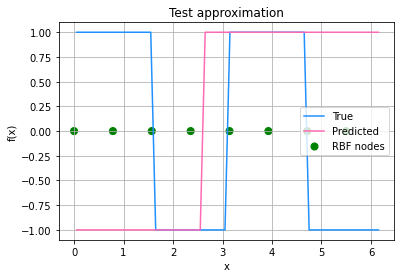

In [41]:
# Plot predicted vs actual output
title = 'Test approximation'
rbf.plot_series(rbfnet,X_test.T,f_test.T,f_test_pred_th.T,title)

In [42]:
# Compute residual error
res_error = rbf.residual_error(f_test,f_test_pred_th)
res_error

1.1612903225806452